In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.cluster import KMeans


In [67]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [68]:
df = pd.read_csv('Downloads/Online_Retail_Data_Set/Online_Retail_Data_Set.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
df.shape

(541909, 8)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [71]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [72]:
df = df.drop(df[df['CustomerID'].isna()==True].index,axis=0)

In [73]:
df.shape

(406829, 8)

In [75]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [76]:
df['Country'].value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [78]:
print(df['Country'].unique())
print('Total no.of countried from  where customers belong: ',df['Country'].nunique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
Total no.of countried from  where customers belong:  37


In [79]:
print('Total no. of customers: ',df['CustomerID'].nunique())
print('Total transactions done: ',df['InvoiceNo'].nunique())
print('Products sold are : ',df['StockCode'].nunique())

Total no. of customers:  4372
Total transactions done:  22190
Products sold are :  3684


In [80]:
df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [81]:
percent_transaction_cancelled = round((df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]['InvoiceNo'].nunique()/df['InvoiceNo'].nunique())*100,2)
print('Percentage of Transaction cancelled are : ', percent_transaction_cancelled)

Percentage of Transaction cancelled are :  16.47


In [82]:
df=df.drop(df[df['InvoiceNo'].apply(lambda x: x[0]=='c')].index,axis=0)
df.shape

(406829, 8)

In [83]:
df['Amount'] = df['Quantity'] = df['UnitPrice']

In [84]:
a=df.groupby('CustomerID').sum()['Amount']
a=a.reset_index()

In [85]:
a.head()

,CustomerID,Amount
0,12346.0,2.08
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30


In [86]:
b = df.groupby('CustomerID')['InvoiceNo'].count()
b=b.reset_index()
b.columns = ['CustomerID','Frequency']

In [87]:
b.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [88]:
df1=pd.merge(a, b, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346.0,2.08,2
1,12347.0,481.21,182
2,12348.0,178.71,31
3,12349.0,605.10,73
4,12350.0,65.30,17


In [89]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [90]:
df['days_diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,days_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2.55,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,3.39,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2.75,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3.39,373 days 04:24:00


In [91]:
c =  df.groupby('CustomerID')['days_diff'].min()
c = c.reset_index()
c.head()

,CustomerID,days_diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [92]:
c['days_diff'] = c['days_diff'].dt.days
c.head()

,CustomerID,days_diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [93]:
df1 = pd.merge(df1, c, on='CustomerID', how='inner')
df1.columns = ['CustomerID','Amount', 'Frequency', 'Recency']
df1

,CustomerID,Amount,Frequency,Recency
0,12346.0,2.08,2,325
1,12347.0,481.21,182,1
2,12348.0,178.71,31,74
3,12349.0,605.10,73,18
4,12350.0,65.30,17,309
...,...,...,...,...
4367,18280.0,47.65,10,277
4368,18281.0,39.36,7,180
4369,18282.0,62.68,13,7
4370,18283.0,1220.93,756,3


In [94]:
df2=df1[['Amount','Frequency','Recency']] # Using only Amount, Frequency and Recency to find the customer segment

In [95]:
df1_scaled = df2.apply(zscore) # scaling of data is required as all the calculations in based on distance
df1_scaled.head()

,Amount,Frequency,Recency
0,-0.249042,-0.391720,2.322023
1,0.123928,0.382657,-0.893733
2,-0.111548,-0.266959,-0.169196
3,0.220367,-0.086271,-0.725005
4,-0.199830,-0.327188,2.163220


In [96]:
kmeans = KMeans(random_state=2)
kmeans.fit(df1_scaled)

KMeans(random_state=2)

In [97]:
cluster_range = range(1, 15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(df1_scaled)
    cluster_errors.append(clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters": cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,13116.000000
1,2,8348.749680
2,3,4757.636734
3,4,3607.417498
4,5,2550.511987
5,6,2071.409929
6,7,1618.734623
7,8,1399.722437
8,9,1222.632886
9,10,1056.281947


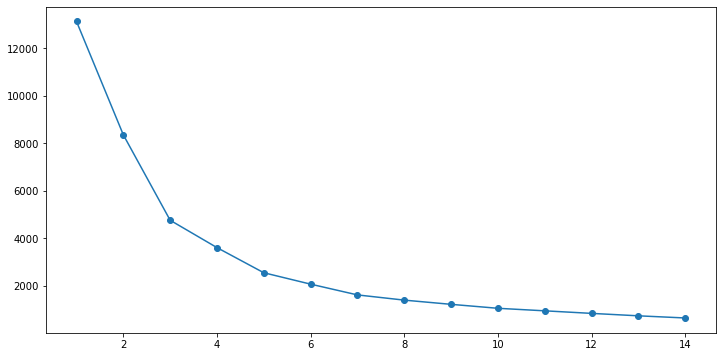

In [98]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')

In [99]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df1_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df1_scaled) )
centroid_df

,Amount,Frequency,Recency
0,0.011321,0.062978,-0.513575
1,-0.173199,-0.281707,1.544502
2,21.699378,14.450500,-0.515159


In [100]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [101]:
df_kmeans = df1.join(df_labels)
df_kmeans.head()

,CustomerID,Amount,Frequency,Recency,labels
0,12346.0,2.08,2,325,1
1,12347.0,481.21,182,1,0
2,12348.0,178.71,31,74,0
3,12349.0,605.10,73,18,0
4,12350.0,65.30,17,309,1


In [ ]:
sns.pairplot(df_kmeans,diag_kind='kde',hue='labels')